<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 2 - Greedy </h2>
</center>
</p>
</div>

<div style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un spanning tree de ese grafo es un subgrafo que tiene que ser un árbol (sin ciclos) y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso, que es un número representativo de algún objeto, distancia, etc. y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o minimum spanning tree es un árbol recubridor que pesa menos o igual que caulquier otro árbol recubridor de ese grafo. Todo grafo tiene un bosque recubridor mínimo.
  </p>
<img width="300px" src="img/mst.png">
  </div>



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Kruskal Algorithm</p></h2>
  El algoritmo de Kruskal es un algoritmo voraz que calcula el MST de un grafo dado. Se basa en ir añadiendo a cada paso la arista más pequeña del grafo que conecte dos subárboles que no estaban previamente conectados.
    
   <center><img width="250px" src="./img/KruskalDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Kruskal para obtener el Minimum Spanning Tree de cualquier grafo no dirigido. 
  </p>


In [11]:
# Imports
import networkx as nx
from networkx.utils import UnionFind
import operator
from heapq import heappop, heappush

In [12]:
def kruskal(G):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo de tipo nx.Graph sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
    Returns:
        tree (nx.Graph): El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    tree = nx.Graph()
    total_weight = 0
    
    for v in G.nodes():
        G.nodes[v]['parent']=v
    
    '''
    Usamos UnionFind, que es una estructura de conjuntos disjuntos presente en networkx
    '''
    subtrees=UnionFind()
    
    edges = G.edges(data=True)
    edges = sorted(edges, key=lambda item:item[2]['weight'])
    
    for a,b,w in edges:
        if subtrees[a]!=subtrees[b]:
            tree.add_edge(a,b,weight=w)
            total_weight+=w['weight']
        subtrees.union(a,b)
        
    return tree, total_weight

In [9]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v,num_e)

for e in G.edges(data=True):
    print(e)

A,w=kruskal(G)
print(A.edges(),w)

(0, 1, {'weight': 10})
(0, 2, {'weight': 7})
(0, 3, {'weight': 15})
(0, 4, {'weight': 3})
(1, 2, {'weight': 19})
(1, 3, {'weight': 11})
(1, 4, {'weight': 16})
(2, 3, {'weight': 2})
(2, 4, {'weight': 16})
(3, 4, {'weight': 19})
[(2, 3), (2, 0), (0, 4), (0, 1)] 22



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Prim Algorithm</p></h2>
  Igual que Kruskal, el algoritmo de Prim es un algoritmo voraz que calcula el MST de un grafo dado. La diferencia fundamental es en el orden en que se añaden aristas. Prim empieza en un nodo concreto y se basa en ir añadiendo a cada paso la arista más pequeña de entre las que conectan los nodos ya pertenecientes al árbol con sus vecinos.
    
   <center><img width="250px" src="./img/PrimDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Prim para obtener el Minimum Spanning Tree de cualquier grafo no dirigido y conexo. 
  </p>


In [26]:
def prim(G,origen=None,infinity=float('inf')):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
        origin (node_id): Opcional, nodo por el cual comenzar la búsqueda.
        infinity (float): Opcional, valor para inicializar las distancias.
    Returns:
        tree (nx.Graph): El grafo que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    if origen==None:
        origen = set(G).pop()
    
    tree = nx.Graph()
    total_weight = 0
    
    for node in G.nodes():
        G.nodes[node]['parent']=node
        G.nodes[node]['cost']=infinity
    
    G.nodes[origen]['cost']=0
    
    A = list(G.nodes())
    v = set()
    
    while len(A)>0:
        in_node = A.pop(0)
        v.add(in_node)
        '''
        Make a list (cost,node_u,node_v) with the edges that goes to adjacent nodes of the tree that we already have,
        but haven't been visited yet, using a heap queue so the are ordered by weight
        '''
        next_step_possible_edges = []
        
        for node in G.adj[in_node].items(): #.items() is in order to have the weight of the in_node and its adj_node stored in node
            heappush(next_step_possible_edges, (node[1]['weight'], in_node, node[0]))
        
        while len(next_step_possible_edges)>0:
            weight_edge, node_1, node_2 = heappop(next_step_possible_edges)
            
            if node_2 not in v and node_2 in A:
                #As we find a new edge we must update the data of the tree and the Graph G
                tree.add_edge(node_1, node_2, weight=weight_edge)
                total_weight += weight_edge
                G.nodes[node_2]['parent'] = node_1
                G.nodes[node_2]['cost'] = weight_edge+G.nodes[node_1]['cost']
                
                v.add(node_2)
                A.remove(node_2)#We can remove without worry about an error cause we know from the if that node_2 is in A
                
                #As we put a new edge to the tree now we have new possbile edges to explore in the next step
                for new_node in G.adj[node_2].items():
                    if new_node[0] not in v:
                        heappush(next_step_possible_edges, (new_node[1]['weight'],node_2,new_node[0]))
        
    
    return tree, total_weight

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


/home/m315/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


TOTAL MST WEIGHT
NX MST  10
Kruskal 10
Prim    10


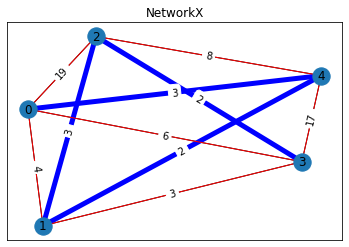

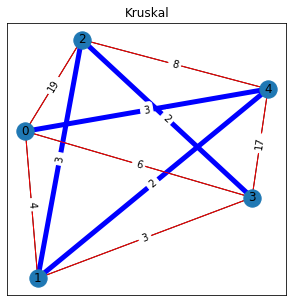

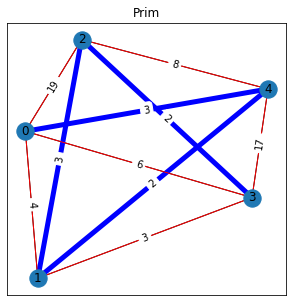

In [28]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v,num_e)

# Run test
test_algs(G,kruskal,prim,0) # 0 for both, 1 for kruskal only, 2 for prim only

<div class="alert alert-warning">
<h1>Pregunta 1</h1>
<p><strong>
Explica las diferencias entre los algoritmos de Kruskal y Prim. ¿Para qué casos (características concretas de un grafo) es uno más eficiente que el otro?
</strong></p>
</div>

<div class="alert alert-warning">
<h1>Pregunta 2</h1>
<p><strong>
Explica tu implementación y analiza la complejidad de ambos algoritmos.
</strong></p>
</div>

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>17 de Noviembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar <b>únicamente este notebook</b> con el nombre:
</p>
<p>
```
[grupo]_[apellido]_[nombre]_2-Greedy.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_2-Greedy.ipynb
```

Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_2-Greedy.zip</li>
    
<li>ZX_Generico_Nombre_2-Greedy.ipynb</li>

<li>Lab2_Generico_Nombre_2-Greedy.rar</li>

<li>2-Greedy.ipynb</li>
<li> ... literalmente cualquier otra cosa que no sea el nombre que sí hay que ponerle </li>
</ul>
</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>kruskal</i> y <i>prim</i> ya que emplearemos un corrector automático para agilizar el proceso. Podéis tener tantas funciones auxiliares como queráis, pero no puede haber dos funciones con el mismo nombre. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.<b> No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica.</b>
</p>
</div>